# **Task 3 EDA**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.hypothesis_analysis import *

# Load Data

In [3]:
data = pd.read_csv('../data/cleaned_insurance_data.csv', low_memory=False, index_col=False)

# Calculate risk and margin

In [4]:
data['Margin'] = data['TotalPremium'] - data['TotalClaims']

In [6]:
def print_test_results(result, risks):
    if 'error' in result:
        print(result['error'])
    else:
        print(f"Test type: {result['test_type']}")
        print(f"Statistic: {result['statistic']}")
        print(f"p-value: {result['p_value']}")
        print(result['interpretation'])
    print(f"Risks:\n{risks}\n")

# Test for Risk Differences across Provinces using Anova Test

In [7]:
print("1. Testing for risk differences across provinces")
province_risks = calculate_risk(data, 'Province', 'TotalPremium')
result = perform_statistical_test(data, 'Province', 'TotalPremium', 'anova')
print_test_results(result, province_risks)

1. Testing for risk differences across provinces
Test type: anova
Statistic: 308.5343902463087
p-value: 0.0
Reject the null hypothesis (p-value: 0.0000). There is a significant difference.
Risks:
Province
Eastern Cape     15.992497
Free State       18.286325
Gauteng          15.150832
KwaZulu-Natal    15.545857
Limpopo          17.632667
Mpumalanga       13.831484
North West       15.117804
Northern Cape    15.119254
Western Cape     12.857935
Name: TotalPremium, dtype: float64



# Test for risk differences across provinces using chi_square test

In [8]:
print("1. Testing for risk differences across provinces")
province_risks = calculate_risk(data, 'Province', 'TotalPremium')
result = perform_statistical_test(data, 'Province', 'TotalPremium', 'chi_square')
print_test_results(result, province_risks)

1. Testing for risk differences across provinces
Test type: chi_square
Statistic: 1675877.9839662637
p-value: 0.0
Reject the null hypothesis (p-value: 0.0000). There is a significant difference.
Risks:
Province
Eastern Cape     15.992497
Free State       18.286325
Gauteng          15.150832
KwaZulu-Natal    15.545857
Limpopo          17.632667
Mpumalanga       13.831484
North West       15.117804
Northern Cape    15.119254
Western Cape     12.857935
Name: TotalPremium, dtype: float64



# Visualizations for Risk Difference accross province

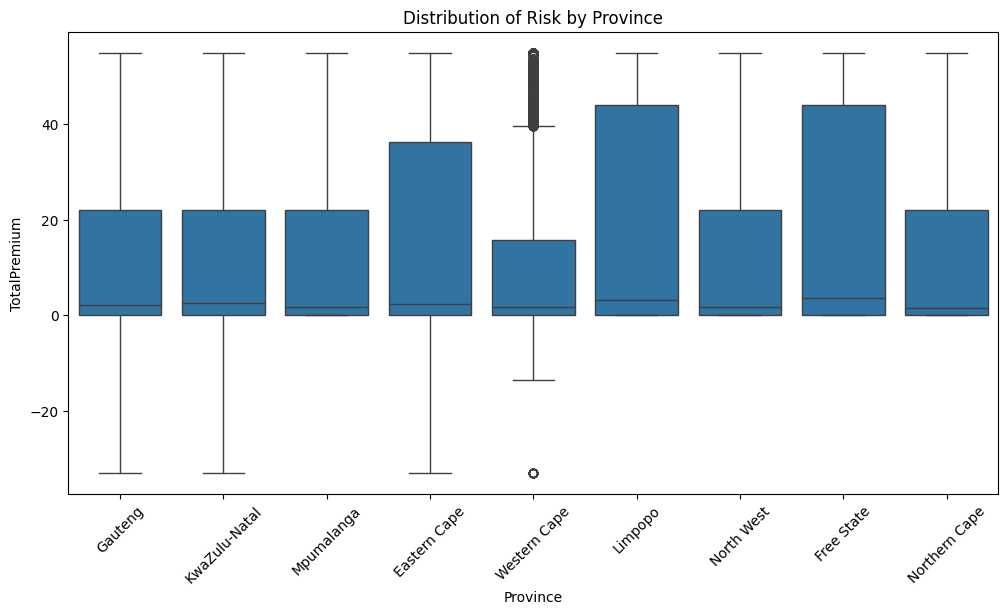

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='TotalPremium', data=data)
plt.title('Distribution of Risk by Province')
plt.xticks(rotation=45)
plt.show()

# Test for risk differences between zipcodes using anova test 

In [11]:
print("2. Testing for risk differences between zipcodes")
zipcode_risks = calculate_risk(data, 'PostalCode', 'TotalPremium')
result = perform_statistical_test(data, 'PostalCode', 'TotalPremium', 'anova')
print_test_results(result, zipcode_risks.nlargest(5))

2. Testing for risk differences between zipcodes
Test type: anova
Statistic: 45.97102609099751
p-value: 0.0
Reject the null hypothesis (p-value: 0.0000). There is a significant difference.
Risks:
PostalCode
284     43.859649
322     43.859649
331     43.859649
1807    43.859649
2210    43.859649
Name: TotalPremium, dtype: float64



# Test for risk differences between zipcodes using chi_square test 

In [12]:
print("2. Testing for risk differences between zipcodes")
zipcode_risks = calculate_risk(data, 'PostalCode', 'TotalPremium')
result = perform_statistical_test(data, 'PostalCode', 'TotalPremium', 'chi_square')
print_test_results(result, zipcode_risks.nlargest(5))

2. Testing for risk differences between zipcodes
Test type: chi_square
Statistic: 143288895.37515512
p-value: 0.0
Reject the null hypothesis (p-value: 0.0000). There is a significant difference.
Risks:
PostalCode
284     43.859649
322     43.859649
331     43.859649
1807    43.859649
2210    43.859649
Name: TotalPremium, dtype: float64



# Test for margin (profit) differences between zip codes using anova test 

In [13]:
print("3. Testing for margin differences between zip codes")
zipcode_margins = calculate_margin(data, 'PostalCode')
result = perform_statistical_test(data, 'PostalCode', 'Margin', 'anova')
print_test_results(result, zipcode_margins.nlargest(5))

3. Testing for margin differences between zip codes
Test type: anova
Statistic: 45.97102609099751
p-value: 0.0
Reject the null hypothesis (p-value: 0.0000). There is a significant difference.
Risks:
PostalCode
2000    2.281240e+06
122     6.682290e+05
299     4.235489e+05
7784    3.321872e+05
2196    2.474567e+05
dtype: float64



# Test for risk differences between Women and Men

In [14]:
print("4. Testing for risk differences between Women and Men")
filtered_data = data[data['Gender'].isin(['Male', 'Female'])]
gender_risks = calculate_risk(filtered_data, 'Gender', 'TotalPremium')
result = perform_statistical_test(filtered_data, 'Gender', 'TotalPremium', 't_test')
print_test_results(result, gender_risks)

4. Testing for risk differences between Women and Men
Test type: t_test
Statistic: 7.670958551805413
p-value: 1.7086864636026e-14
Reject the null hypothesis (p-value: 0.0000). There is a significant difference.
Risks:
Gender
Female    14.230912
Male      14.910986
Name: TotalPremium, dtype: float64



# Visualizations for Risk difference between Men and Women

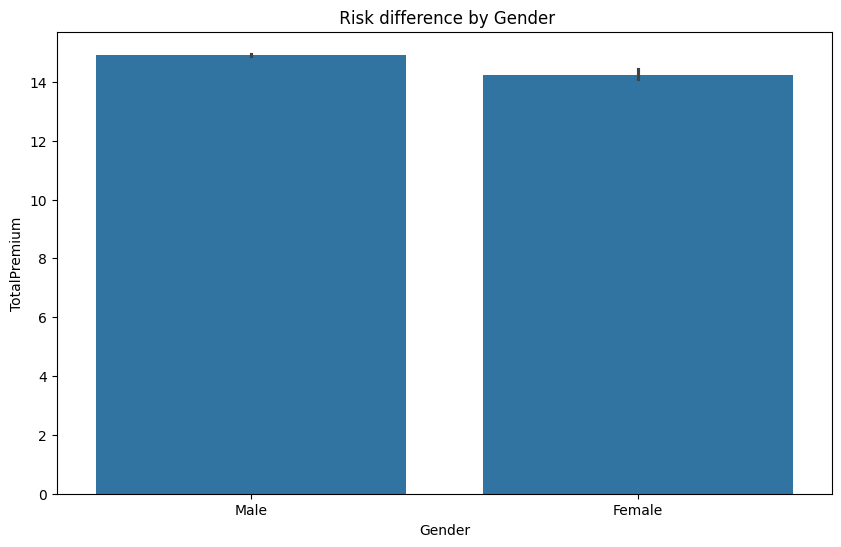

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='TotalPremium', data=filtered_data)
plt.title(' Risk difference by Gender')
plt.show()

**===> Observation**
 - Since the p-value is much smaller than the typical alpha level (0.05), the test results correctly indicate the rejection of the null hypothesis. Even though the risk difference appears small visually, statistical significance can still be present due to factors such as sample size or data distribution. While the p-value suggests that the difference is statistically significant, the actual difference in the means seems minimal.